<a href="https://colab.research.google.com/github/zoro-21/Analytical/blob/main/EmployeeAttritionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

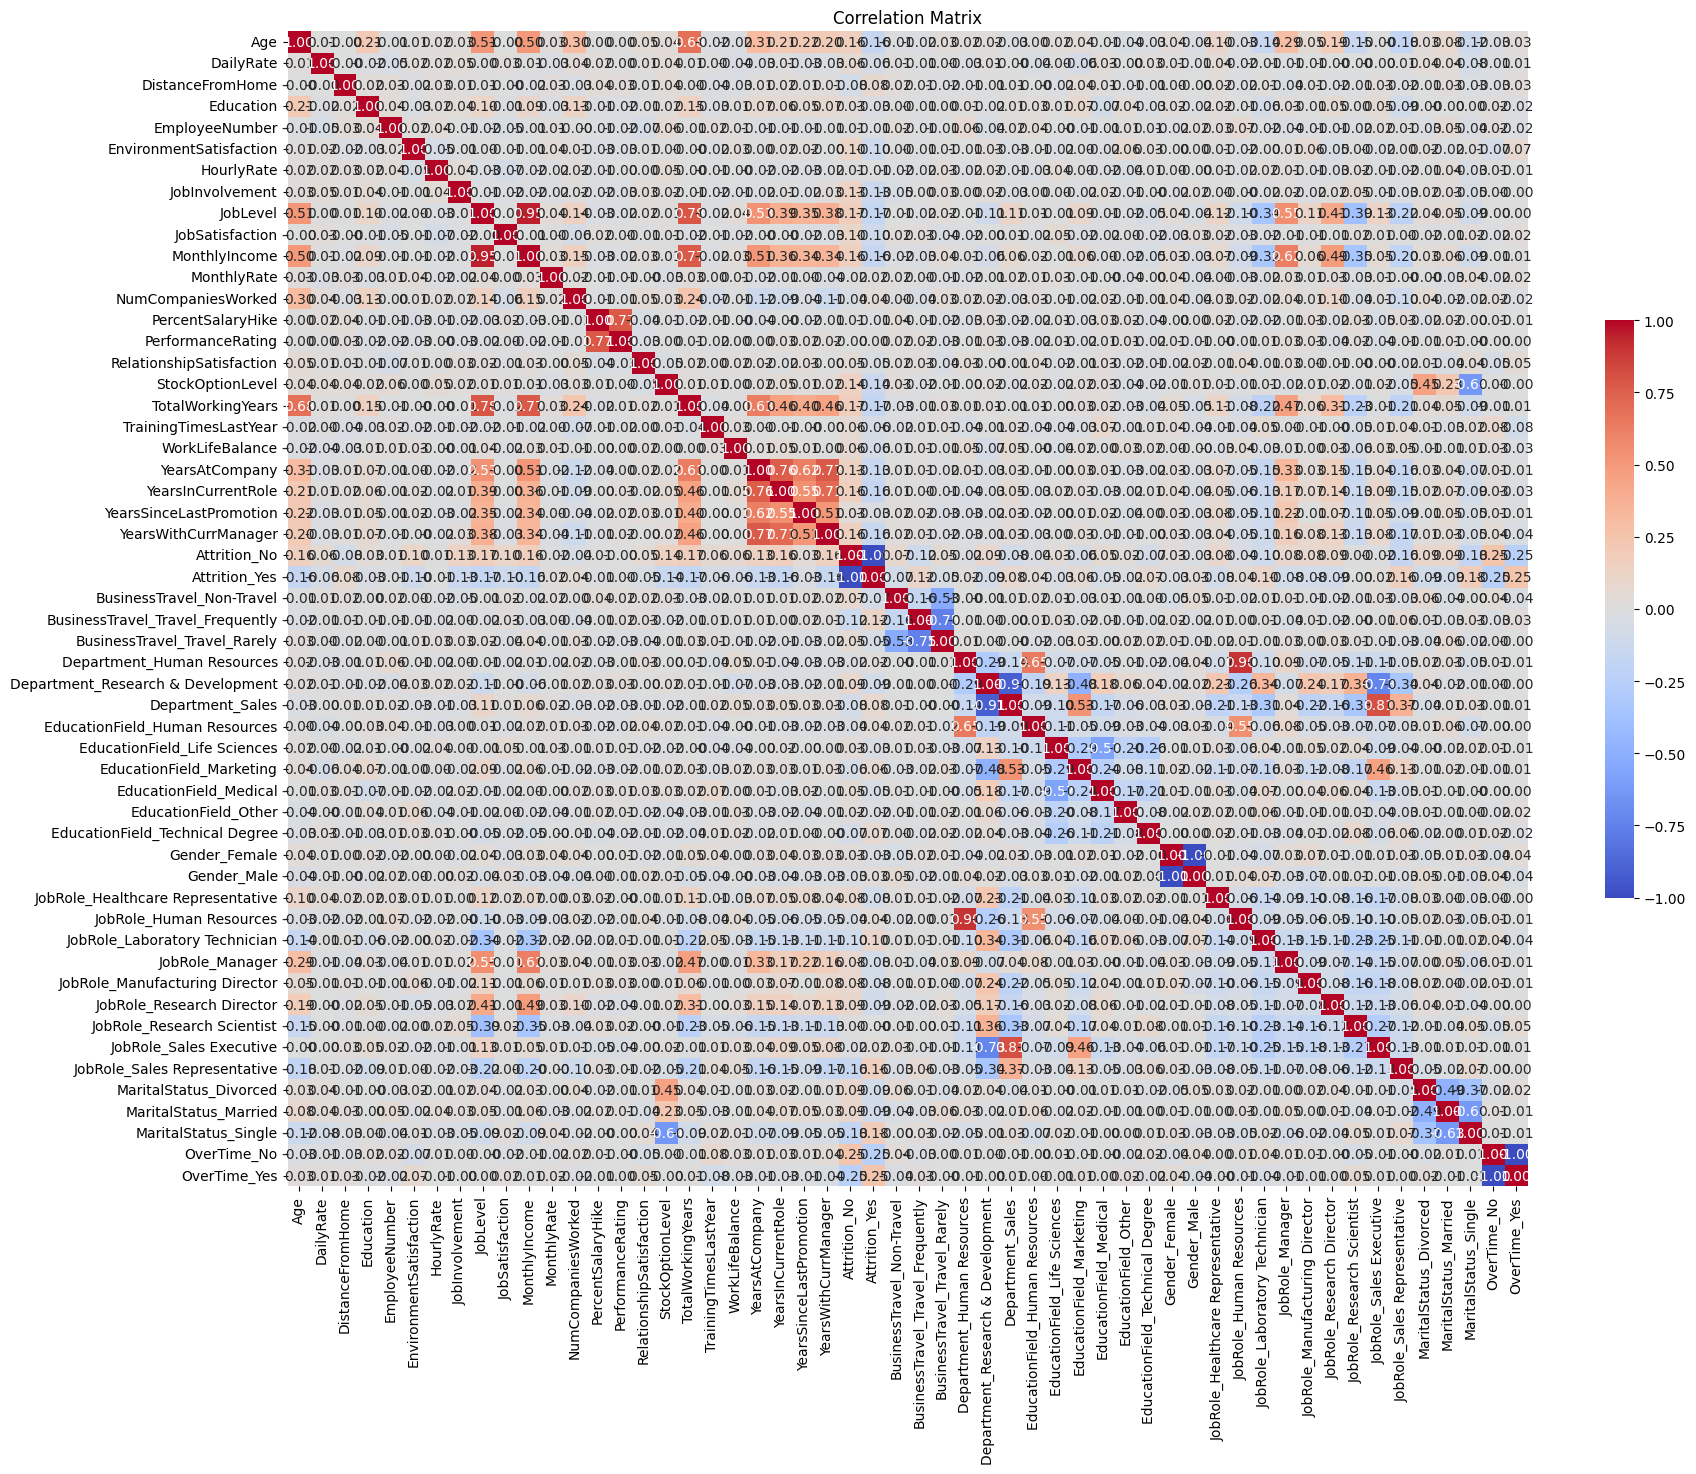

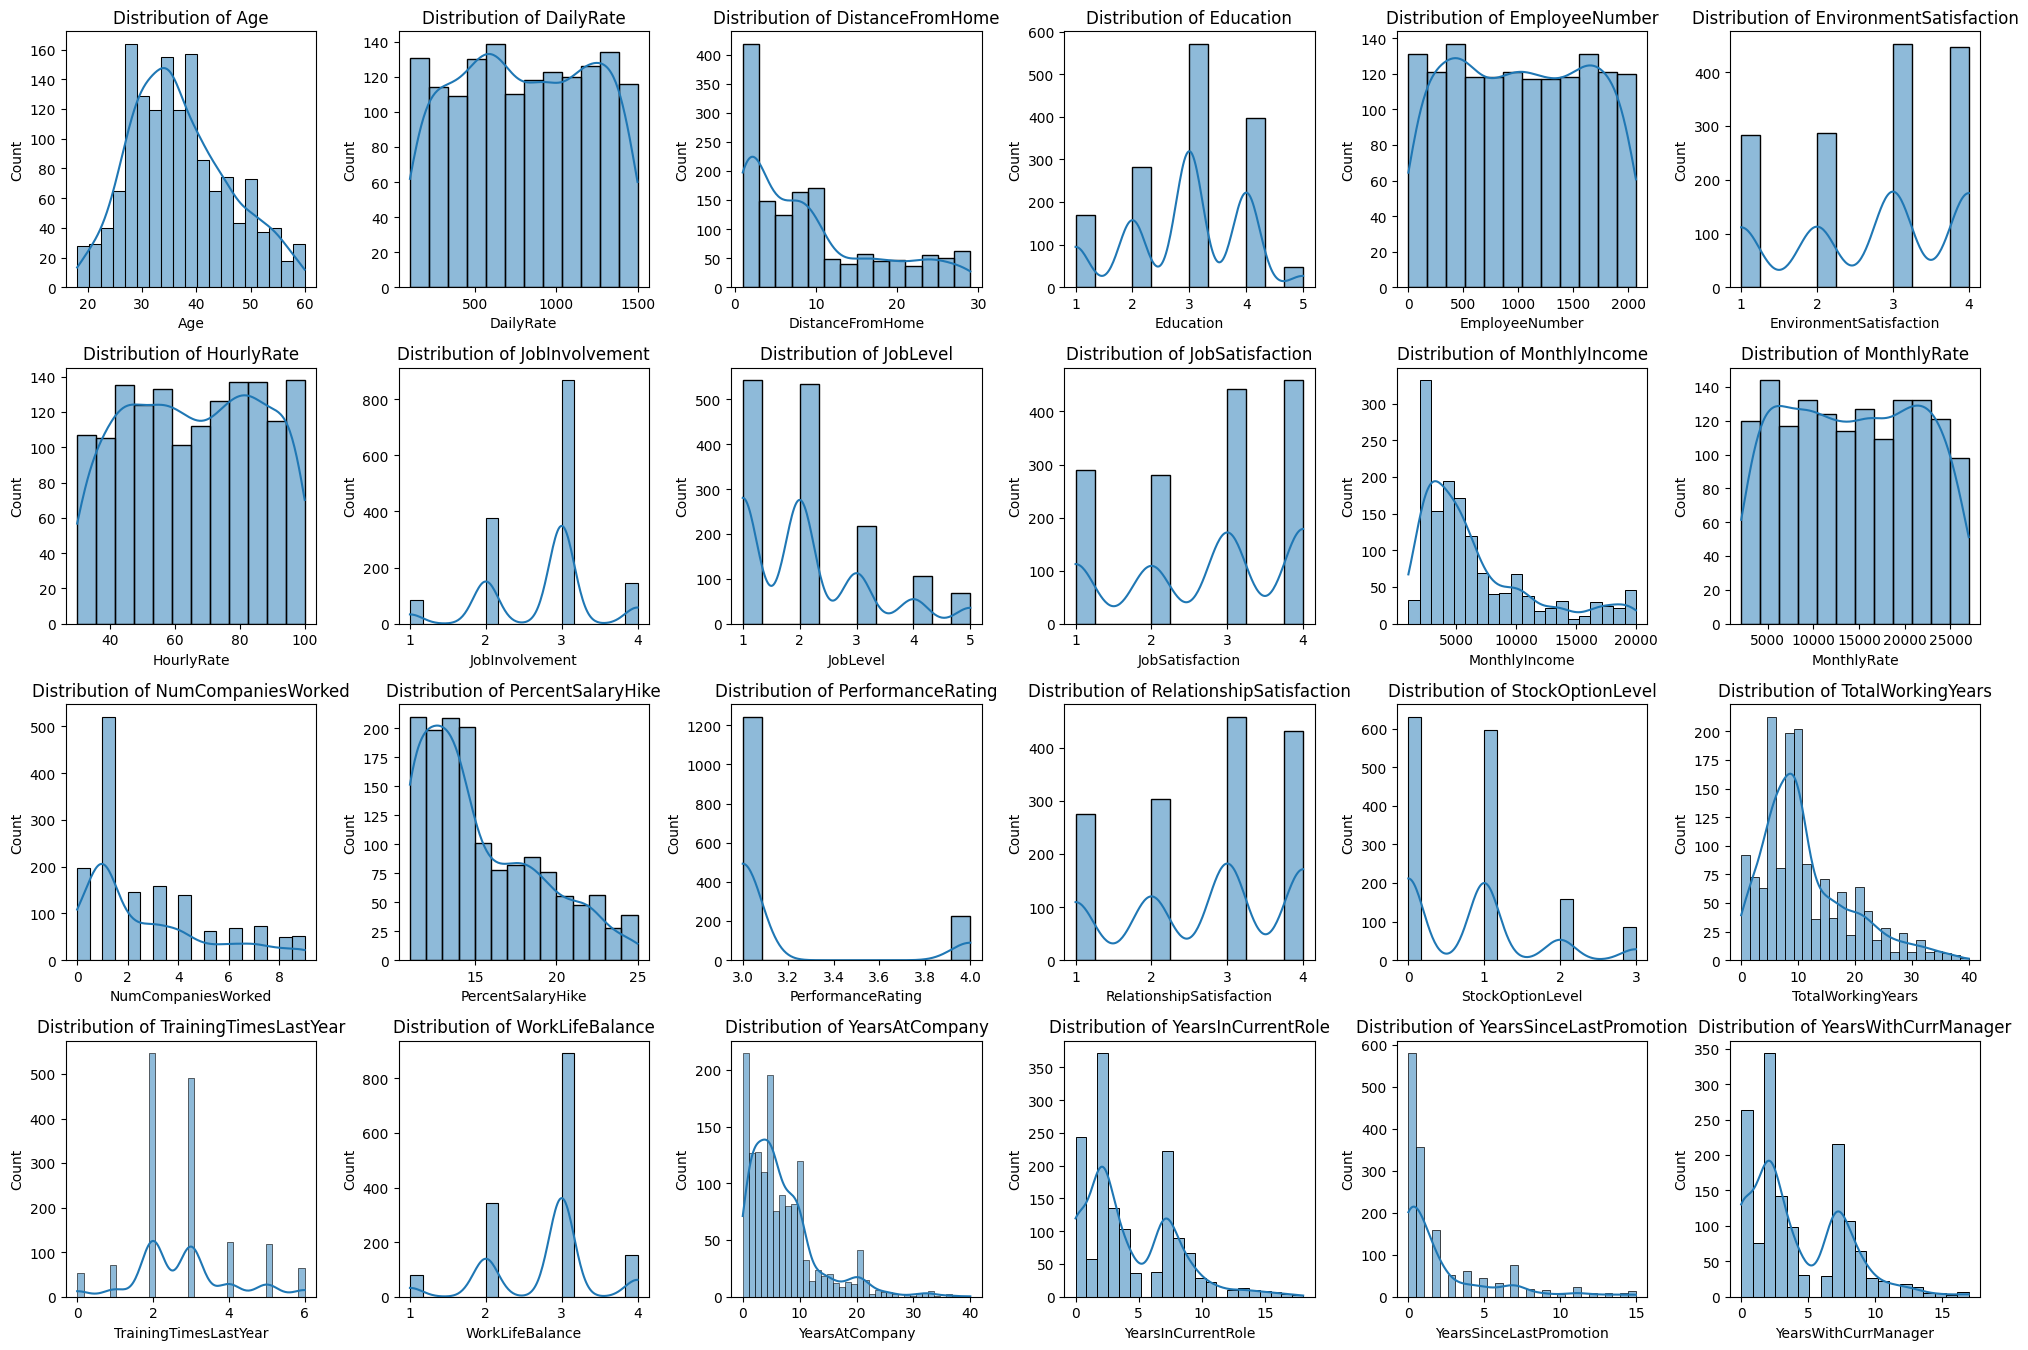

T-statistic: -6.178663835307217, P-value: 8.356308021103587e-10


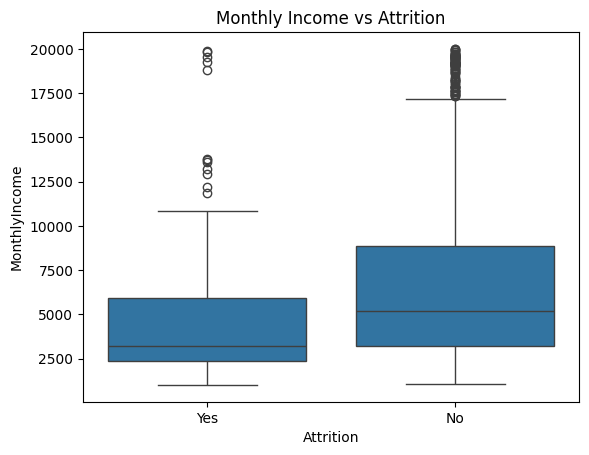

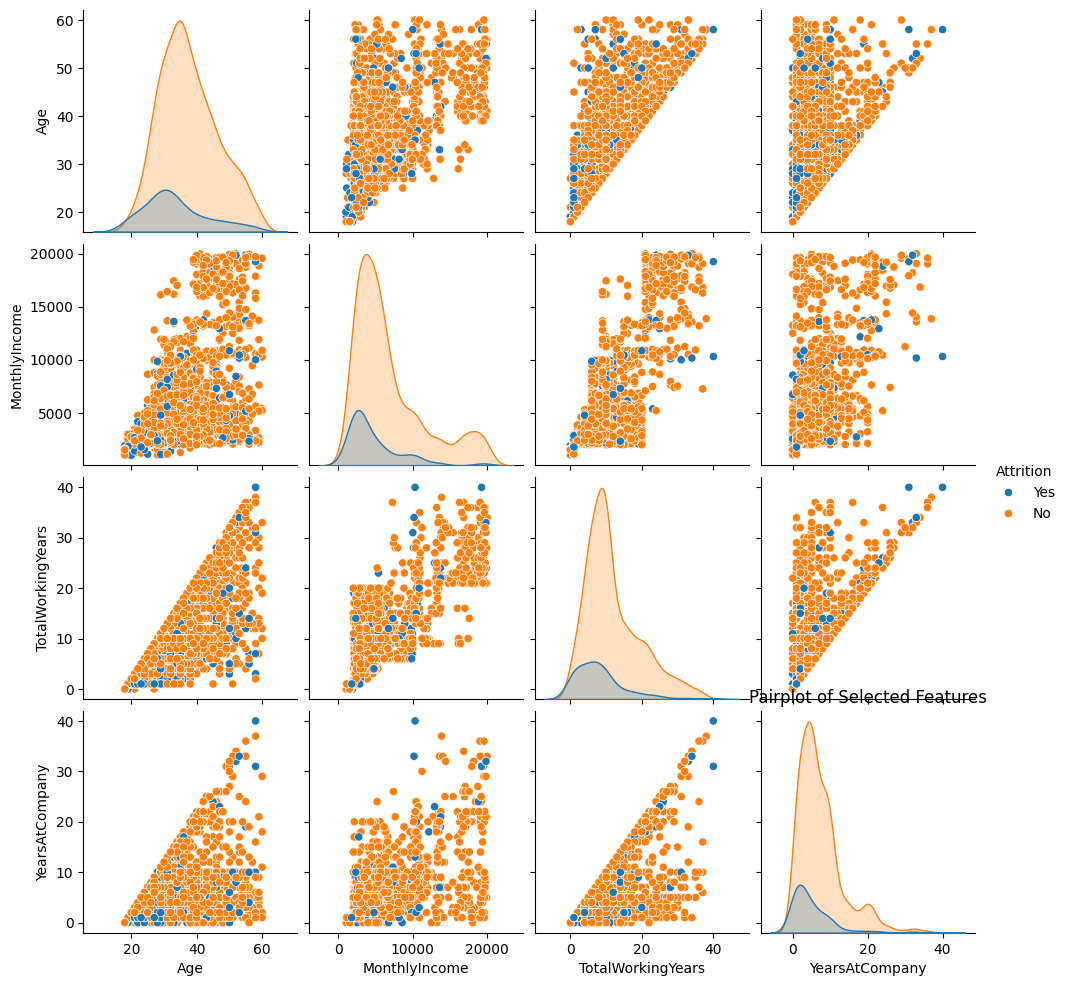

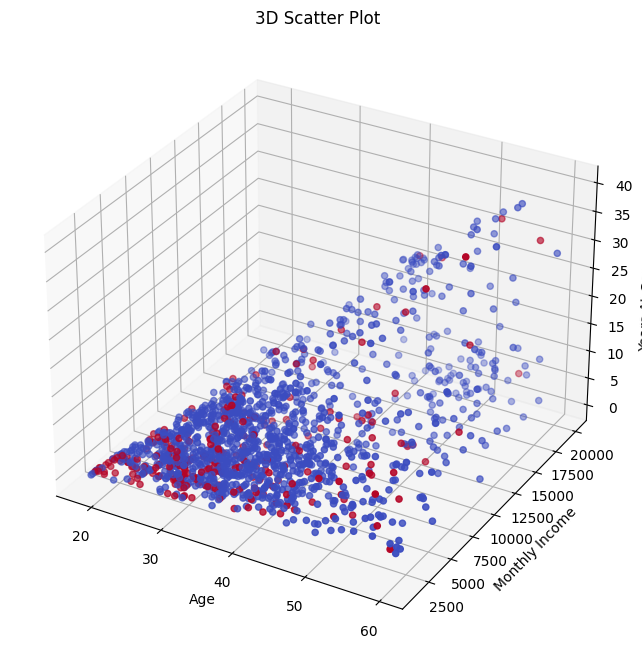

Random Forest Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       380
        True       1.00      1.00      1.00        61

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

Decision Tree Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       380
        True       1.00      1.00      1.00        61

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

SVM Classification Report
              precision    recall  f1-score   support

       False       0.86      1.00      0.93       380
        True       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

Logistic Regression Classification Report
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       380
        True       0.75      0.54      0.63        61

    accuracy                           0.91       441
   macro avg       0.84      0.76      0.79       441
weighted avg       0.90      0.91      0.91       441



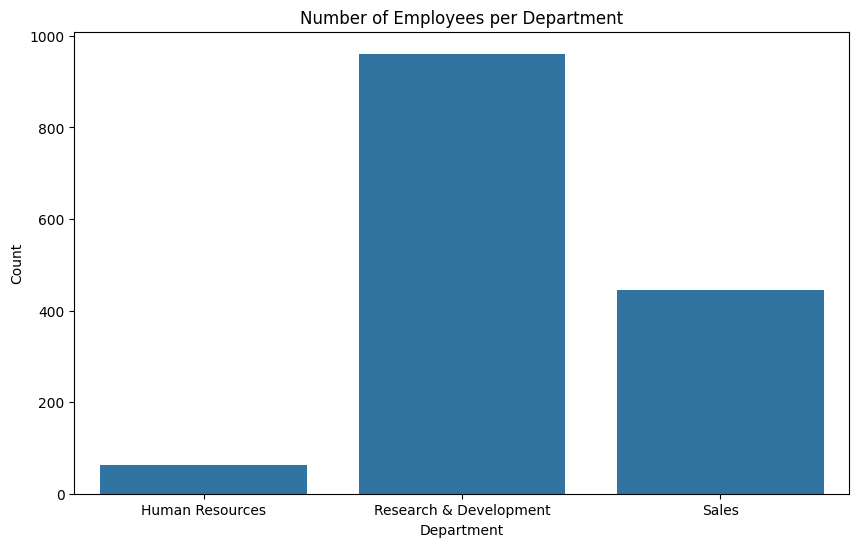

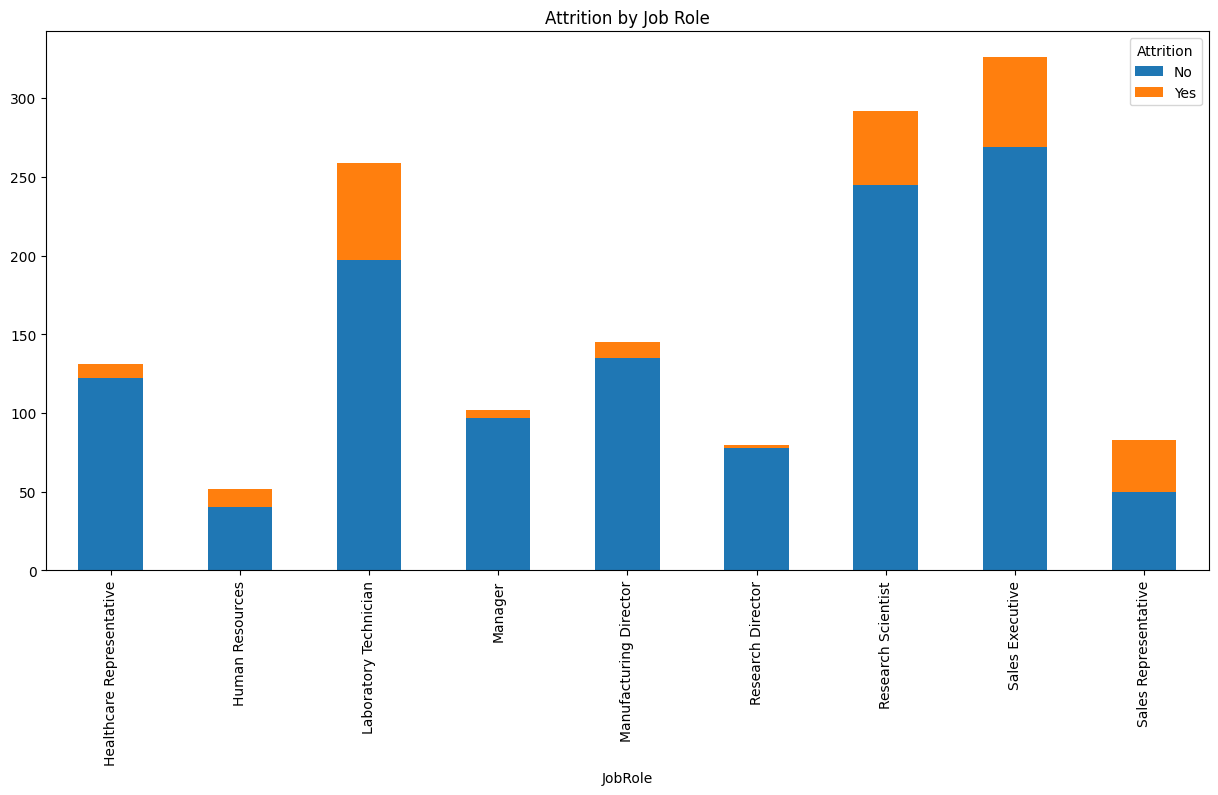

Total Employees: 1470
Employees Left: 237
Current Employees: 1233
Statistics for Sales Department
              Age    DailyRate  DistanceFromHome   Education  EmployeeNumber  \
count  446.000000   446.000000        446.000000  446.000000      446.000000   
mean    36.542601   800.275785          9.365471    2.934978     1038.946188   
std      9.032611   402.797474          8.086808    1.031105      599.722536   
min     18.000000   107.000000          1.000000    1.000000        1.000000   
25%     30.000000   472.000000          2.000000    2.000000      513.750000   
50%     35.000000   770.500000          7.000000    3.000000      991.000000   
75%     42.000000  1171.000000         13.000000    4.000000     1566.500000   
max     60.000000  1499.000000         29.000000    5.000000     2065.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               446.000000  446.000000      446.000000  446.000000   
mean                  2.679372   

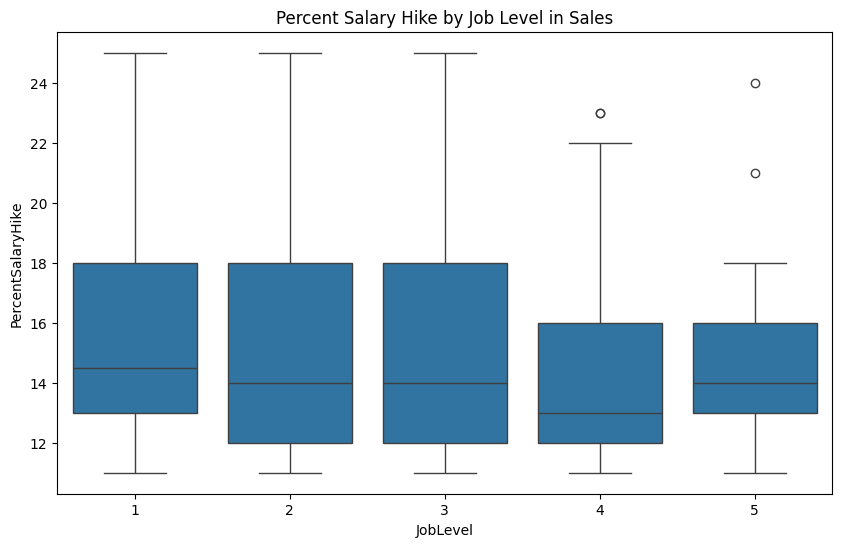

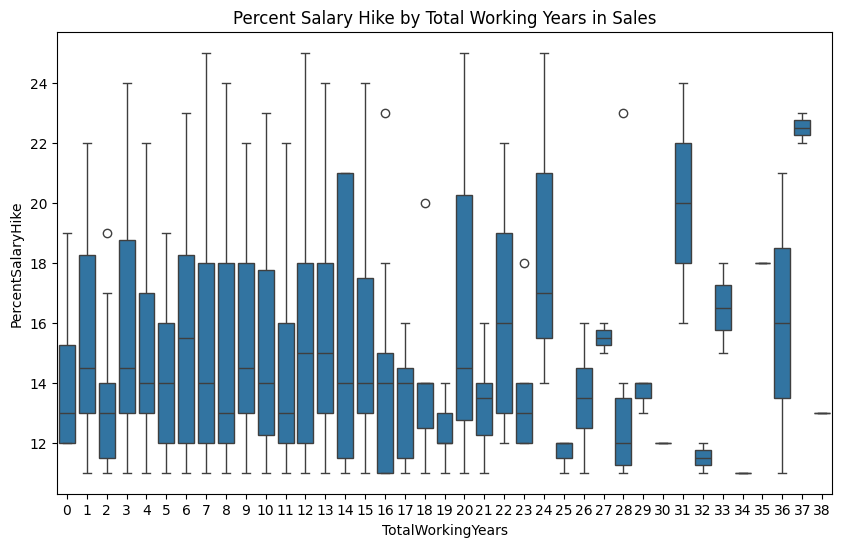

Statistics for Research & Development Department
              Age    DailyRate  DistanceFromHome   Education  EmployeeNumber  \
count  961.000000   961.000000        961.000000  961.000000      961.000000   
mean    37.042664   806.851197          9.144641    2.899063     1006.503642   
std      9.178964   402.513333          8.122044    1.024293      602.681958   
min     18.000000   102.000000          1.000000    1.000000        2.000000   
25%     30.000000   469.000000          2.000000    2.000000      460.000000   
50%     36.000000   810.000000          7.000000    3.000000     1014.000000   
75%     43.000000  1153.000000         14.000000    4.000000     1539.000000   
max     60.000000  1496.000000         29.000000    5.000000     2068.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               961.000000  961.000000      961.000000  961.000000   
mean                  2.744017   66.167534        2.741935    1.977107   
std     

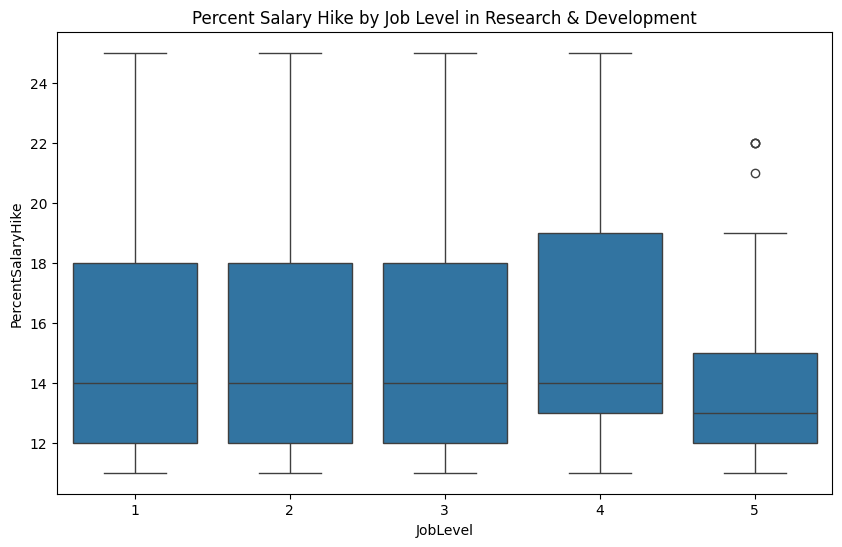

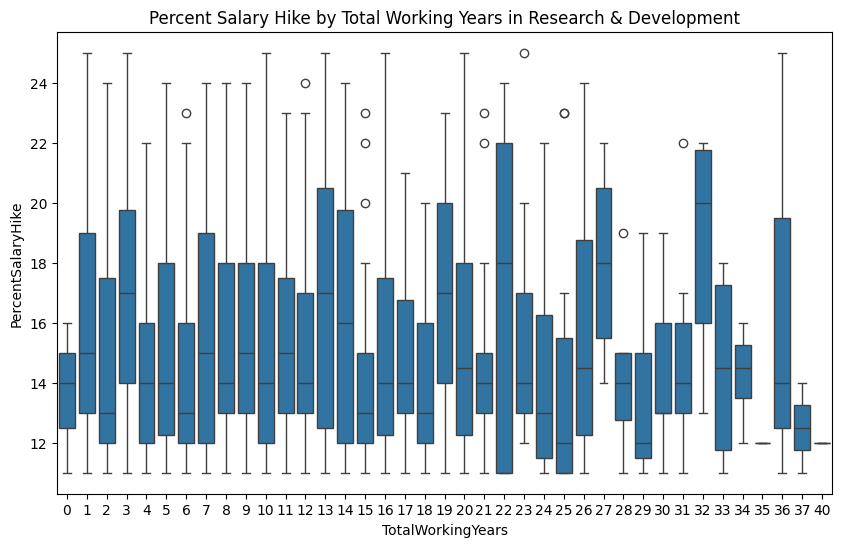

Statistics for Human Resources Department
             Age    DailyRate  DistanceFromHome  Education  EmployeeNumber  \
count  63.000000    63.000000         63.000000  63.000000       63.000000   
mean   37.809524   751.539683          8.698413   2.968254     1205.269841   
std     9.226290   426.203943          8.115368   0.983218      584.798179   
min    19.000000   106.000000          1.000000   1.000000      103.000000   
25%    30.500000   351.000000          2.000000   2.000000      732.500000   
50%    37.000000   788.000000          6.000000   3.000000     1314.000000   
75%    44.000000  1146.500000         12.000000   4.000000     1745.000000   
max    59.000000  1444.000000         26.000000   5.000000     2040.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement   JobLevel  \
count                63.000000   63.000000       63.000000  63.000000   
mean                  2.682540   64.301587        2.746032   2.031746   
std                   1.013225   21.

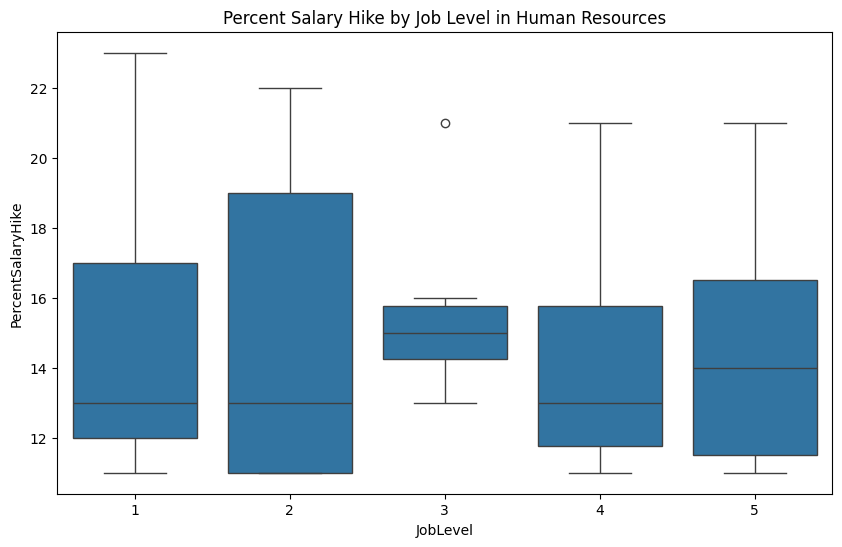

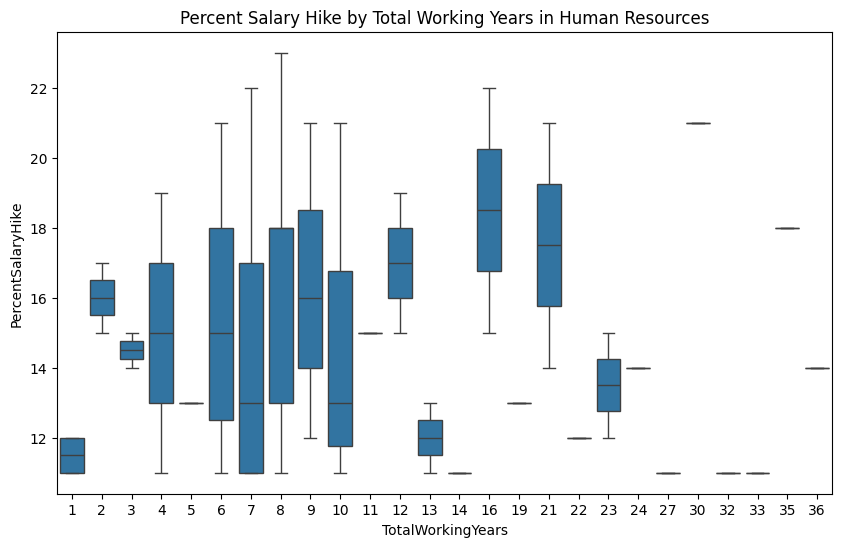

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind

# Load the dataset
file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)
df_encoded = pd.get_dummies(df)

# Exploratory Data Analysis (EDA)
# Correlation Matrix
plt.figure(figsize=(20, 15))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})
plt.title('Correlation Matrix')
plt.show()

# Distribution Analysis
num_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 30))
for i, col in enumerate(num_cols, 1):
    plt.subplot(9, 6, i)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Hypothesis Testing (Example: T-test for attrition based on age)
attrition_yes = df[df['Attrition'] == 'Yes']
attrition_no = df[df['Attrition'] == 'No']

# Perform t-test on Age
t_stat, p_value = ttest_ind(attrition_yes['Age'], attrition_no['Age'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Bivariate Analysis
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

# Multivariate Analysis
sns.pairplot(df, hue='Attrition', vars=['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany'])
plt.title('Pairplot of Selected Features')
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['MonthlyIncome'], df['YearsAtCompany'], c=pd.Categorical(df['Attrition']).codes, cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
ax.set_zlabel('Years At Company')
plt.title('3D Scatter Plot')
plt.show()

# Machine Learning Models
# Prepare data for modeling
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

# Department Analysis
department_group = df.groupby('Department').size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Count', data=department_group)
plt.title('Number of Employees per Department')
plt.show()

# HR Strategies Analysis (Example: Attrition by Job Role)
job_role_group = df.groupby(['JobRole', 'Attrition']).size().unstack().fillna(0)
job_role_group.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Attrition by Job Role')
plt.show()

# Company Growth Analysis
total_employees = df.shape[0]
left_employees = df[df['Attrition'] == 'Yes'].shape[0]
current_employees = total_employees - left_employees

print(f"Total Employees: {total_employees}")
print(f"Employees Left: {left_employees}")
print(f"Current Employees: {current_employees}")

# Statistical Analysis for Each Department
departments = df['Department'].unique()
for department in departments:
    dept_data = df[df['Department'] == department]
    print(f"Statistics for {department} Department")
    print(dept_data.describe())

    # Hike Margin Analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='JobLevel', y='PercentSalaryHike', data=dept_data)
    plt.title(f'Percent Salary Hike by Job Level in {department}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TotalWorkingYears', y='PercentSalaryHike', data=dept_data)
    plt.title(f'Percent Salary Hike by Total Working Years in {department}')
    plt.show()